# 独立主成分分析(ICA)
## 課題１

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

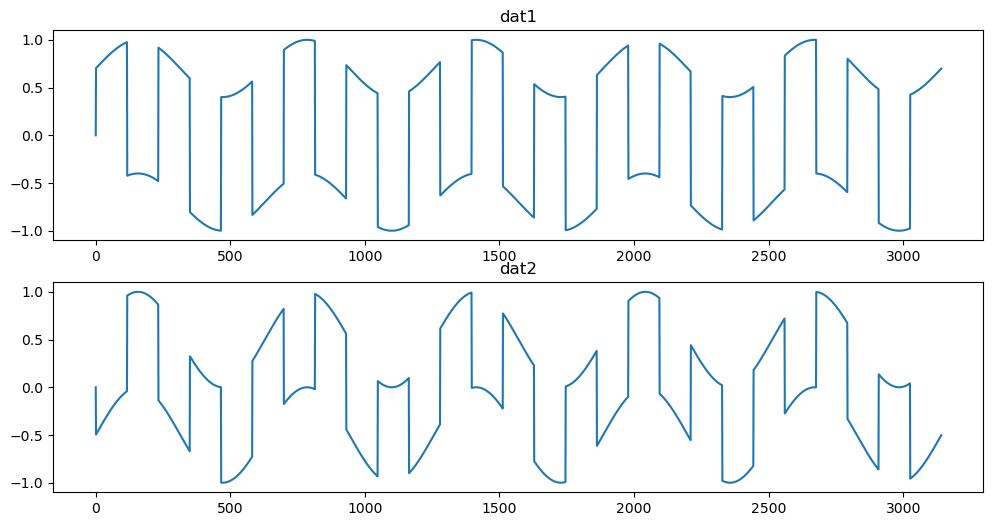

In [53]:
# dat1.txtの波形を表示
with open("dat1.txt", "r") as file:
    amp1 = [float(i.strip()) for i in file.readlines()]
xs = [i for i in range(0, 3142)]

# dat2.txtの波形を表示
with open("dat2.txt", "r") as file:
    amp2 = [float(i.strip()) for i in file.readlines()]

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("dat1")
plt.plot(amp1)

plt.subplot(2, 1, 2)
plt.title("dat2")
plt.plot(amp2)

In [57]:
# サンプル数
n = len(amp1)

#　観測データ
mat_x = np.matrix([amp1, amp2])

# 平均が0になるように調整
mat_x = mat_x - np.mean(mat_x, axis = 1)
print("観測データ mat_x = ", mat_x)

# 共分散行列
mat_cov = np.matmul(mat_x, mat_x.T) / n
print("共分散行列 mat_cov = ", mat_cov)

# mat_covを対角化する
eigenvalues, P = np.linalg.eig(mat_cov)
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)
print("P = ", P)
print("D = ", D)
print("P^-1 = ", P_inv)

# 行列Vを作る
D2 = np.diag(eigenvalues ** (-1/2))
mat_v = P @ D2 @ P_inv
print("V = ", mat_v)

# 白色化後の行列
mat_z = mat_v @ mat_x
print("mat_z = ", mat_z)

# mat_zの共分散行列は単位行列になるはず
print("mat_zの共分散行列(単位行列になるはず、、)", np.matmul(mat_z, mat_z.T) / n)

観測データ mat_x =  [[-0.02606608  0.67693387  0.67993352 ...  0.66615683  0.66915616
   0.67215597]
 [ 0.01861891 -0.47638118 -0.47138176 ... -0.49434291 -0.48934403
  -0.48434434]]
共分散行列 mat_cov =  [[ 0.53433146 -0.27433077]
 [-0.27433077  0.37435198]]
P =  [[ 0.79997641  0.60003145]
 [-0.60003145  0.79997641]]
D =  [[0.74009639 0.        ]
 [0.         0.16858705]]
P^-1 =  [[ 0.79997641 -0.60003145]
 [ 0.60003145  0.79997641]]
V =  [[1.620764   0.61110104]
 [0.61110104 1.97713534]]
mat_z =  [[-0.03086894  0.80603301  0.81394988 ...  0.77758953  0.78550556
   0.79342286]
 [ 0.02088309 -0.52819507 -0.51647746 ... -0.57029371 -0.55857734
  -0.54685911]]
mat_zの共分散行列(単位行列になるはず、、) [[ 1.00000000e+00 -3.43738052e-16]
 [-3.43738052e-16  1.00000000e+00]]


In [59]:
#　Independent Component Analysis
def ica(seed):
    global mat_z
    mat_z = np.asarray(mat_z)
    np.random.seed(seed)
    w_prev = np.random.rand(2, 1)
    w_prev = w_prev / np.linalg.norm(w_prev)
    w = w_prev
    compare = np.array([[10, 10]])

    while np.linalg.norm(compare) > 0.000001:
        zwz3 = mat_z * ((w_prev.T @ mat_z) ** 3)
        zwz3 = zwz3.mean(axis = 1).reshape(-1, 1)
        w = zwz3 - 3 * w_prev
        if w[0] < 0:
            w = -w
        w = w / np.linalg.norm(w)
        compare = w_prev - w
        w_prev = w
        
    mat_z = np.asmatrix(mat_z)
    return w

In [61]:
w1 = ica(1).T
print("w1 = ", w1)
w2 = ica(2).T
print("w2 = ", w2)

w1 =  [[0.56011824 0.82841267]]
w2 =  [[ 0.82860315 -0.55983642]]


mat_w [[ 0.56011824  0.82841267]
 [ 0.82860315 -0.55983642]]
信号源データ mat_y =  [[ 9.55760459e-06  1.39103006e-02  2.80517046e-02 ... -3.68964497e-02
  -2.27565512e-02 -8.61440041e-03]
 [-3.72692120e-02  9.63584327e-01  9.63584327e-01 ...  9.63584327e-01
   9.63584327e-01  9.63584327e-01]]


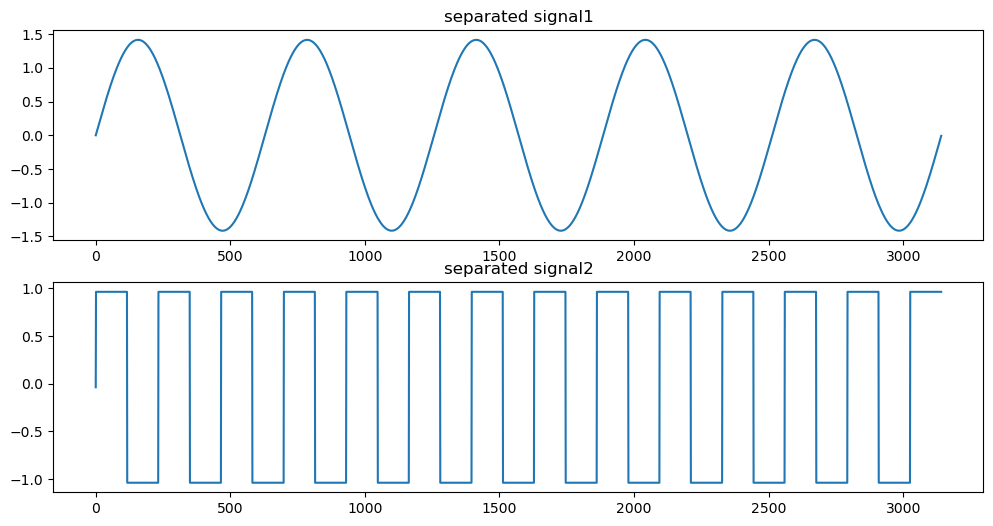

In [63]:
# w1とw2が異なっていることが確認できたので、
mat_w = np.stack((w1, w2)).reshape(2, -1)
print("mat_w = ", mat_w)

# 信号源データ
mat_y = mat_w @ mat_z
print("信号源データ mat_y = ", mat_y)

y_amp1 = []
y_amp2 = []
for i in range(n):
    y_amp1.append(mat_y[0, i])
    y_amp2.append(mat_y[1, i])

#結果の表示
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("separated signal1")
plt.plot(y_amp1)

plt.subplot(2, 1, 2)
plt.title("separated signal2")
plt.plot(y_amp2)